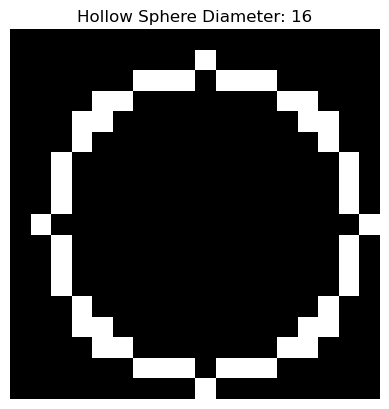

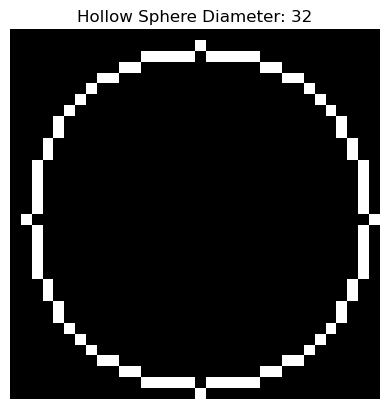

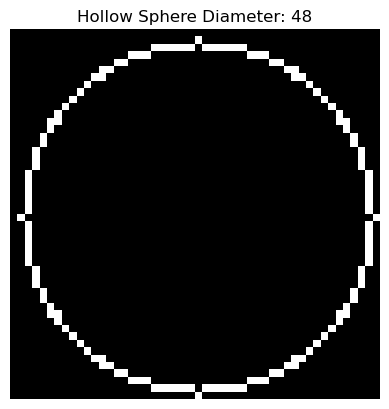

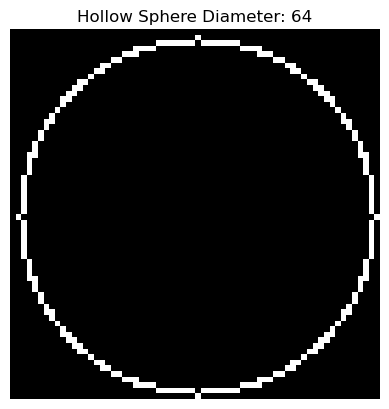

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import binary_erosion, binary_dilation

def create_hollow_sphere(diameter):
    # Create a binary sphere
    radius = diameter // 2
    size = diameter + 2  # Add extra space for boundary effects
    center = size // 2

    # Create a 3D grid
    x, y, z = np.indices((size, size, size))
    distance = np.sqrt((x - center)**2 + (y - center)**2 + (z - center)**2)
    
    # Define the sphere
    sphere = (distance <= radius).astype(int)
    
    # Create hollow effect by applying erosion
    inner_radius = radius - 1
    inner_sphere = (distance <= inner_radius).astype(int)
    hollow_sphere = sphere - inner_sphere
    
    return hollow_sphere

def plot_sphere_slice(hollow_sphere, diameter):
    fig, ax = plt.subplots()
    
    # Find a slice through the center
    slice_index = hollow_sphere.shape[0] // 2
    slice_2d = hollow_sphere[slice_index, :, :]
    
    # Plot the 2D slice
    ax.imshow(slice_2d, cmap='gray')
    ax.set_title(f'Hollow Sphere Diameter: {diameter}')
    ax.axis('off')

    plt.show()

def generate_and_plot_spheres(min_diameter, max_diameter, step):
    for diameter in range(min_diameter, max_diameter + 1, step):
        hollow_sphere = create_hollow_sphere(diameter)
        plot_sphere_slice(hollow_sphere, diameter)

# Generate and plot hollow spheres with diameters from 16 to 64 pixels
generate_and_plot_spheres(16, 64, 16)


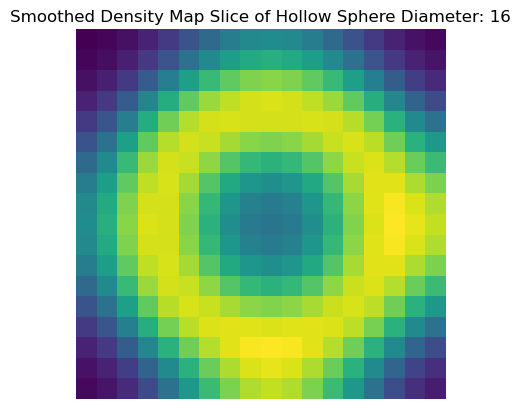

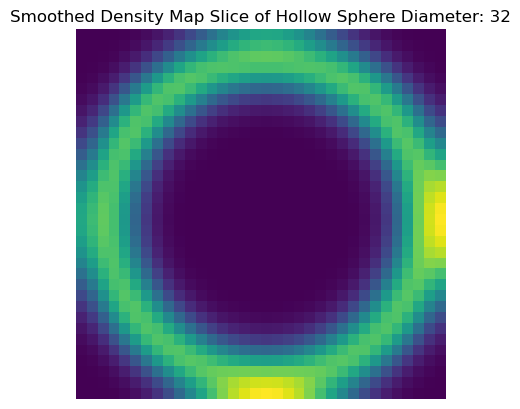

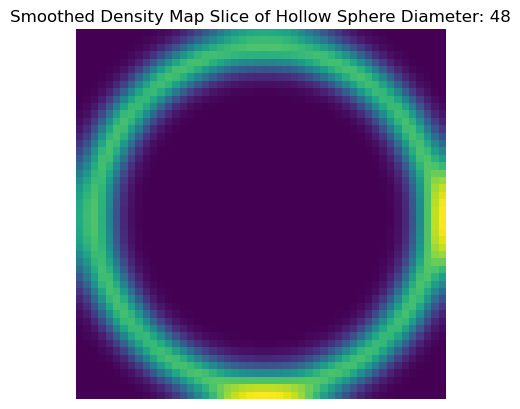

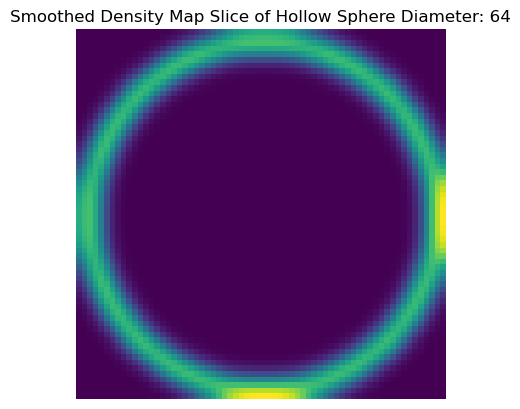

: 

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter

def create_density_map(diameter, density=1.0):
    radius = diameter // 2
    size = diameter + 2  # Add extra space for boundary effects
    center = size // 2

    # Create a 3D grid
    x, y, z = np.indices((size, size, size))
    distance = np.sqrt((x - center)**2 + (y - center)**2 + (z - center)**2)
    
    # Define the sphere
    outer_sphere = (distance <= radius).astype(float)
    inner_radius = radius - 1
    inner_sphere = (distance <= inner_radius).astype(float)
    
    # Create hollow sphere by subtracting the inner sphere from the outer sphere
    hollow_sphere = outer_sphere - inner_sphere
    
    # Apply a constant density
    density_map = hollow_sphere * density
    
    return density_map

def smooth_density_map(density_map, sigma=2.0):
    # Apply Gaussian filter to smooth the density map
    smoothed_map = gaussian_filter(density_map, sigma=sigma)
    return smoothed_map

def plot_density_slice(density_map, diameter):
    fig, ax = plt.subplots()
    
    # Find a slice through the center
    slice_index = density_map.shape[0] // 2 +4
    slice_2d = density_map[slice_index, :, :]
    
    # Plot the 2D slice
    ax.imshow(slice_2d, cmap='viridis')
    ax.set_title(f'Smoothed Density Map Slice of Hollow Sphere Diameter: {diameter}')
    ax.axis('off')

    plt.show()

def generate_and_plot_density_maps(min_diameter, max_diameter, step, sigma):
    for diameter in range(min_diameter, max_diameter + 1, step):
        density_map = create_density_map(diameter)
        smoothed_map = smooth_density_map(density_map, sigma=sigma)
        plot_density_slice(smoothed_map, diameter)

# Generate and plot smoothed density maps for hollow spheres with diameters from 16 to 64 pixels
generate_and_plot_density_maps(16, 64, 16, sigma=2.0)


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import Delaunay
from mpl_toolkits.mplot3d import Axes3D

def generate_3d_volume(nGrid=64):
    X, Y, Z = np.meshgrid(np.linspace(-(nGrid-1)/2, (nGrid-1)/2, nGrid), np.linspace(-(nGrid-1)/2, (nGrid-1)/2, nGrid), np.linspace(-(nGrid-1)/2, (nGrid-1)/2, nGrid))
    QP = np.vstack([X.ravel(), Y.ravel(), Z.ravel()]).T
    
    P0 = np.random.rand() * 10 + 20
    P1 = np.random.rand() * 2.5 + 2.5
    tipX, tipY, tipZ = sphere(100)
    tipX = tipX.ravel() * P1
    tipY = tipY.ravel() * P1
    tipZ = tipZ.ravel() * P1
    print(tipX[50])
    T = np.vstack([np.column_stack([tipX - P0/2, tipY, tipZ]),
                   np.column_stack([tipX + P0/2, tipY, tipZ]),
                   np.column_stack([tipX, tipY + P0/2*np.sqrt(3), tipZ])])
    
    T[:, 1] -= P0/2*np.sqrt(3)/3
    S = Delaunay(T)
    indexIntersect = np.isfinite(S.find_simplex(QP))
    print(indexIntersect)
    mask = indexIntersect.reshape((nGrid, nGrid, nGrid)).astype(float)
    return mask-1

def rand_rot_3D(vertices):
    t = np.random.rand() * 360
    RZ1 = np.array([[np.cos(np.deg2rad(t)), -np.sin(np.deg2rad(t)), 0],
                    [np.sin(np.deg2rad(t)), np.cos(np.deg2rad(t)), 0],
                    [0, 0, 1]])
    t = np.random.rand() * 360
    RX = np.array([[1, 0, 0],
                   [0, np.cos(np.deg2rad(t)), -np.sin(np.deg2rad(t))],
                   [0, np.sin(np.deg2rad(t)), np.cos(np.deg2rad(t))]])
    t = np.random.rand() * 360
    RZ2 = np.array([[np.cos(np.deg2rad(t)), -np.sin(np.deg2rad(t)), 0],
                    [np.sin(np.deg2rad(t)), np.cos(np.deg2rad(t)), 0],
                    [0, 0, 1]])
    vertices = vertices @ RZ1
    vertices = vertices @ RX
    vertices = vertices @ RZ2
    return vertices

def rand_trans_3D(vertices):
    vertices += (np.random.rand(1, 3) * 10 - 5)
    return vertices

def sphere(res):
    phi, theta = np.mgrid[0:np.pi:complex(res), 0:2*np.pi:complex(res)]
    x = np.sin(phi) * np.cos(theta)
    y = np.sin(phi) * np.sin(theta)
    z = np.cos(phi)
    return x, y, z

def visualize_3d_volume(volume):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.voxels(volume, edgecolor='k')
    plt.show()

# Generate and visualize the 3D volume
volume = generate_3d_volume()
print(volume.shape)
visualize_3d_volume(volume)


-0.0


(array([     0,      1,      2, ..., 262141, 262142, 262143]),)


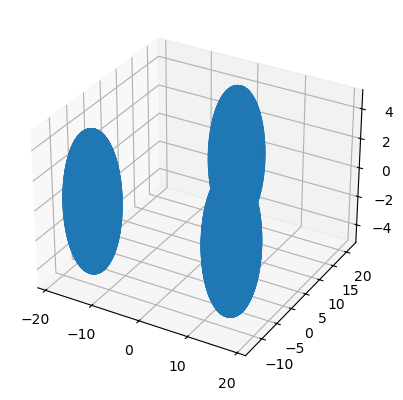

In [1]:
def sphere(res):
    phi, theta = np.mgrid[0:np.pi:complex(res), 0:2*np.pi:complex(res)]
    x = np.sin(phi) * np.cos(theta)
    y = np.sin(phi) * np.sin(theta)
    z = np.cos(phi)
    return x, y, z
nGrid = 64
from scipy.spatial import Delaunay
import numpy as np
X, Y, Z = np.meshgrid(np.linspace(-(nGrid-1)/2, (nGrid-1)/2, nGrid), np.linspace(-(nGrid-1)/2, (nGrid-1)/2, nGrid), np.linspace(-(nGrid-1)/2, (nGrid-1)/2, nGrid))
QP = np.vstack([X.ravel(), Y.ravel(), Z.ravel()]).T

P0 = np.random.rand() * 10 + 20
P1 = np.random.rand() * 2.5 + 2.5
tipX, tipY, tipZ = sphere(100)
tipX = tipX.ravel() * P1
tipY = tipY.ravel() * P1
tipZ = tipZ.ravel() * P1
T = np.vstack([np.column_stack([tipX - P0/2, tipY, tipZ]),
                np.column_stack([tipX + P0/2, tipY, tipZ]),
                np.column_stack([tipX, tipY + P0/2*np.sqrt(3), tipZ])])

T[:, 1] -= P0/2*np.sqrt(3)/3
S = Delaunay(T)
indexIntersect = S.find_simplex(QP)
def visualize_3d_volume(volume):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.voxels(volume, edgecolor='k')
    plt.show()
mask = indexIntersect!=-1
mask = mask.reshape((nGrid, nGrid, nGrid)).astype(float)
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter
mask = gaussian_filter(mask, sigma=1)
visualize_3d_volume(mask)

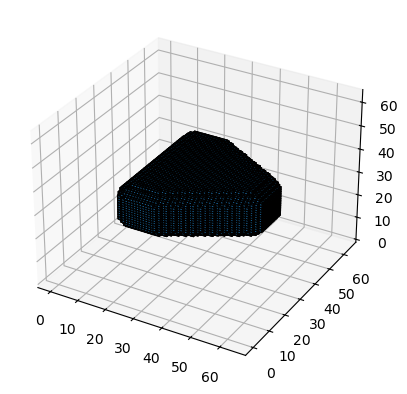

In [2]:
def visualize_3d_volume(volume):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.voxels(volume, edgecolor='k')
    plt.show()
mask = indexIntersect!=-1
mask = mask.reshape((nGrid, nGrid, nGrid)).astype(float)
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter
mask = gaussian_filter(mask, sigma=1)
visualize_3d_volume(mask)

In [4]:
mask[20:40, 20:40, 20:40] 

array([[[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         2.05564307e-02, 1.67198431e-03, 6.04516937e-05],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         2.05565829e-02, 1.67201730e-03, 6.04544017e-05],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         2.05565829e-02, 1.67201730e-03, 6.04544017e-05],
        ...,
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         2.05565829e-02, 1.67201730e-03, 6.04544017e-05],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         2.05565829e-02, 1.67201730e-03, 6.04544017e-05],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         2.05565829e-02, 1.67201730e-03, 6.04544017e-05]],

       [[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         5.62378706e-02, 6.38704944e-03, 3.53089101e-04],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         5.62399070e-02, 6.38750361e-03, 3.53126381e-04],
        [0.00000000e+00, 

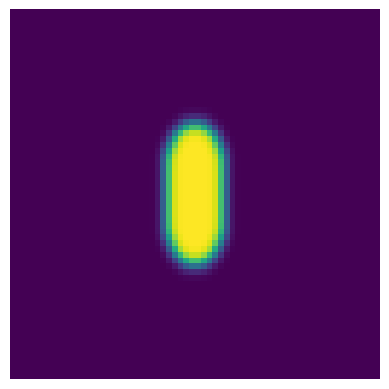

In [5]:
def plot_density_slice(density_map ):
    fig, ax = plt.subplots()
    
    # Find a slice through the center
    slice_index = density_map.shape[0] // 2 +4
    slice_2d = density_map[slice_index, :, :]
    
    # Plot the 2D slice
    ax.imshow(slice_2d, cmap='viridis')
    ax.axis('off')

    plt.show()

plot_density_slice(mask)